In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cache = np.load("/gpfs/share/home/2201111701/Kaiwencheng/DiffSynth-Studio/examples/wanvideo/results/examples/wan/attn_map.npy", allow_pickle=True)

In [2]:
cache.shape

(2000, 1300, 23, 23)

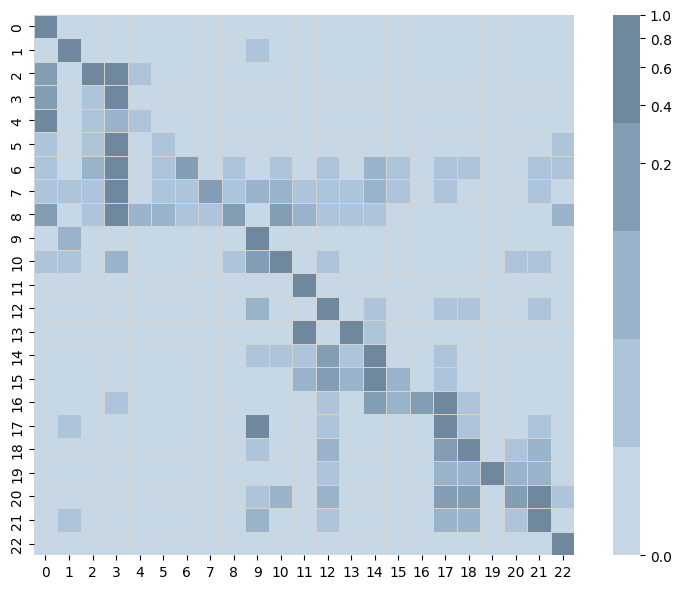

In [45]:
from matplotlib.colors import PowerNorm

# 自定义莫兰迪风格的蓝色调色板（低饱和度、灰调）
morandi_blue_lighter = [
    "#c6d7e6",
    "#adc4db",
    "#99b3cb",
    "#839db5",
    "#6f889e"
]

norm = PowerNorm(gamma=0.2, vmin=0, vmax=1)

# 绘图
plt.figure(figsize=(8, 6))
sns.heatmap(cache[5,1], cmap=sns.color_palette(morandi_blue_lighter, as_cmap=True),
            norm=norm, square=True, linewidths=0.5, linecolor='lightgray')
plt.tight_layout()
plt.show()

In [2]:
def visualize_head(att_map, midpoint=0.5, cmap='seismic', enhance=False):
    """
    参数:
    - att_map: 2D numpy array，注意力图或其他 heatmap
    - midpoint: 双峰中点（默认 0.5）
    - cmap: 颜色映射
    - enhance: 是否自动增强颜色对比度
    """
    fig, ax = plt.subplots(figsize=(20, 10))

    if enhance:
        # 用 TwoSlopeNorm 放大对比度：将中间值变成色彩“过渡点”
        norm = TwoSlopeNorm(vmin=np.min(att_map), vcenter=midpoint, vmax=np.max(att_map))
    else:
        norm = Normalize(vmin=np.min(att_map), vmax=np.max(att_map))  # 线性

    im = ax.imshow(att_map, cmap=cmap, norm=norm)
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.set_label("Attention weight")
    plt.title("Enhanced Attention Map")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def softmax(x, axis=None):
    # 减去最大值防止溢出，提高数值稳定性
    x_max = np.max(x, axis=axis, keepdims=True)
    e_x = np.exp(x - x_max)
    return e_x / np.sum(e_x, axis=axis, keepdims=True)

In [14]:
cache = np.load("/gpfs/share/home/2201111701/Kaiwencheng/DiffSynth-Studio/examples/wanvideo/results/examples/wan/attn_map.npy", allow_pickle=True)

In [4]:
cache.shape  # ()

(4000, 1300, 22, 514)

In [5]:
cache_avg = np.mean(cache, axis=(0,1))

In [7]:
np.fill_diagonal(cache_avg, 0)

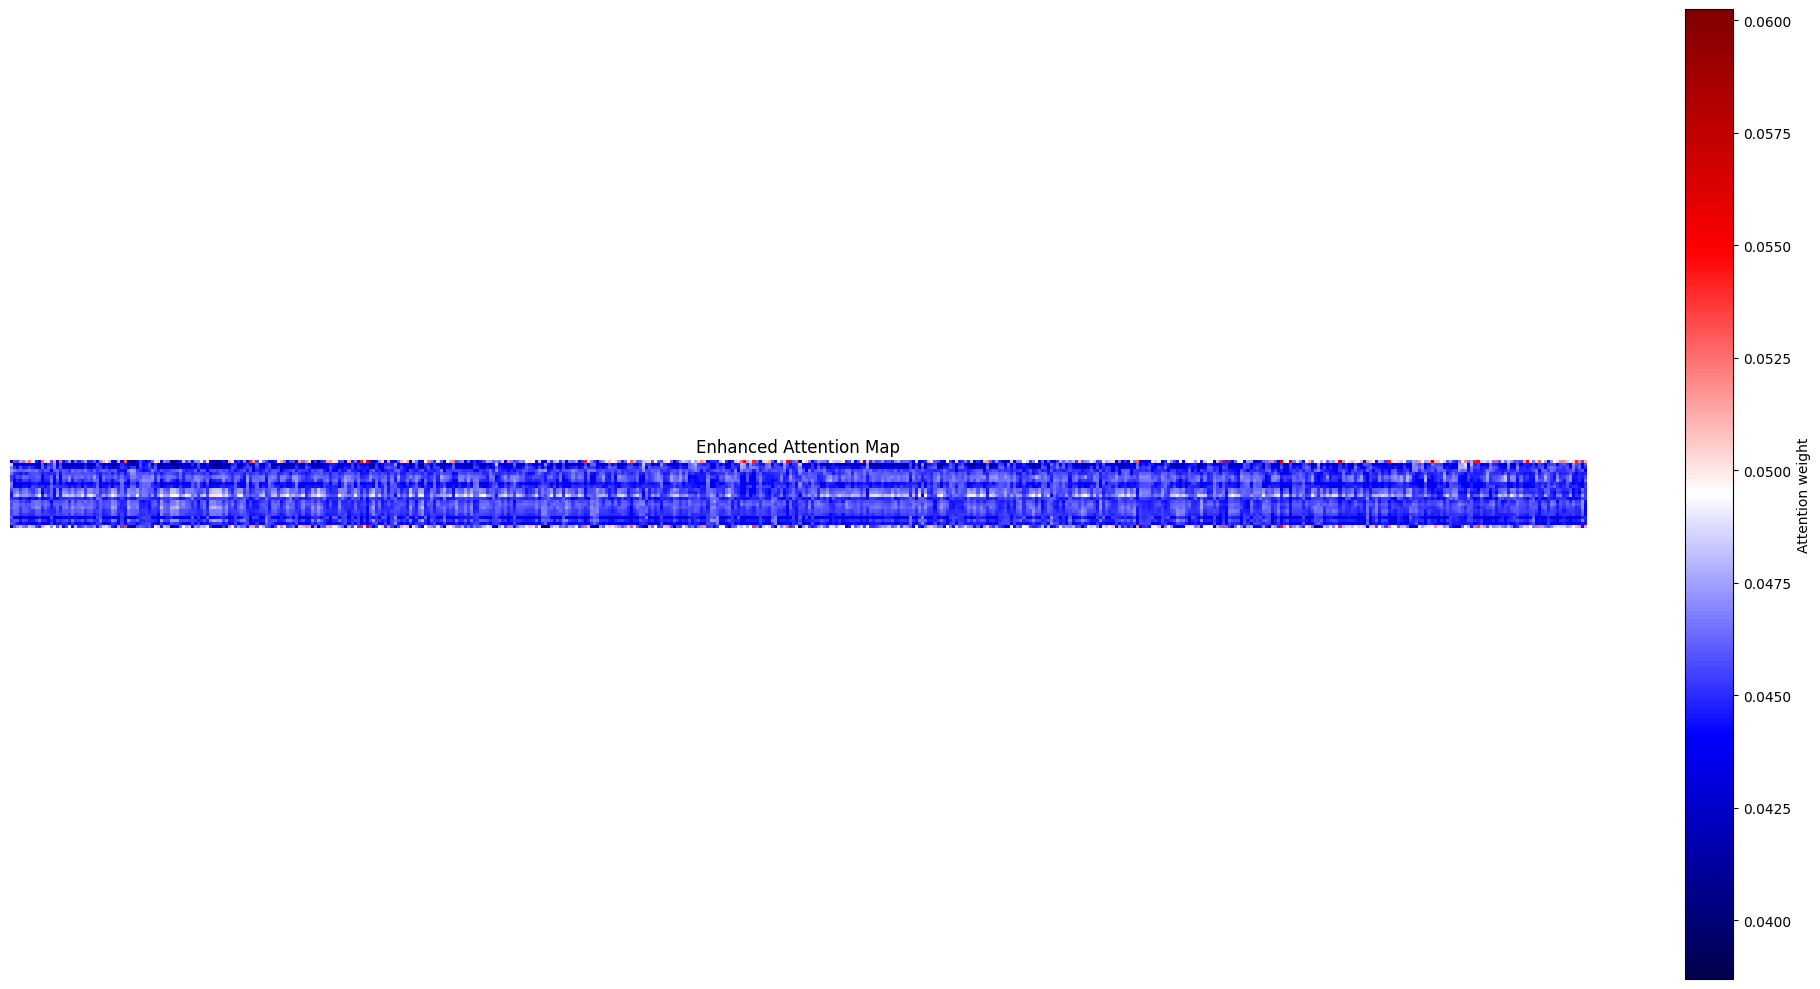

In [6]:
visualize_head(cache_avg)

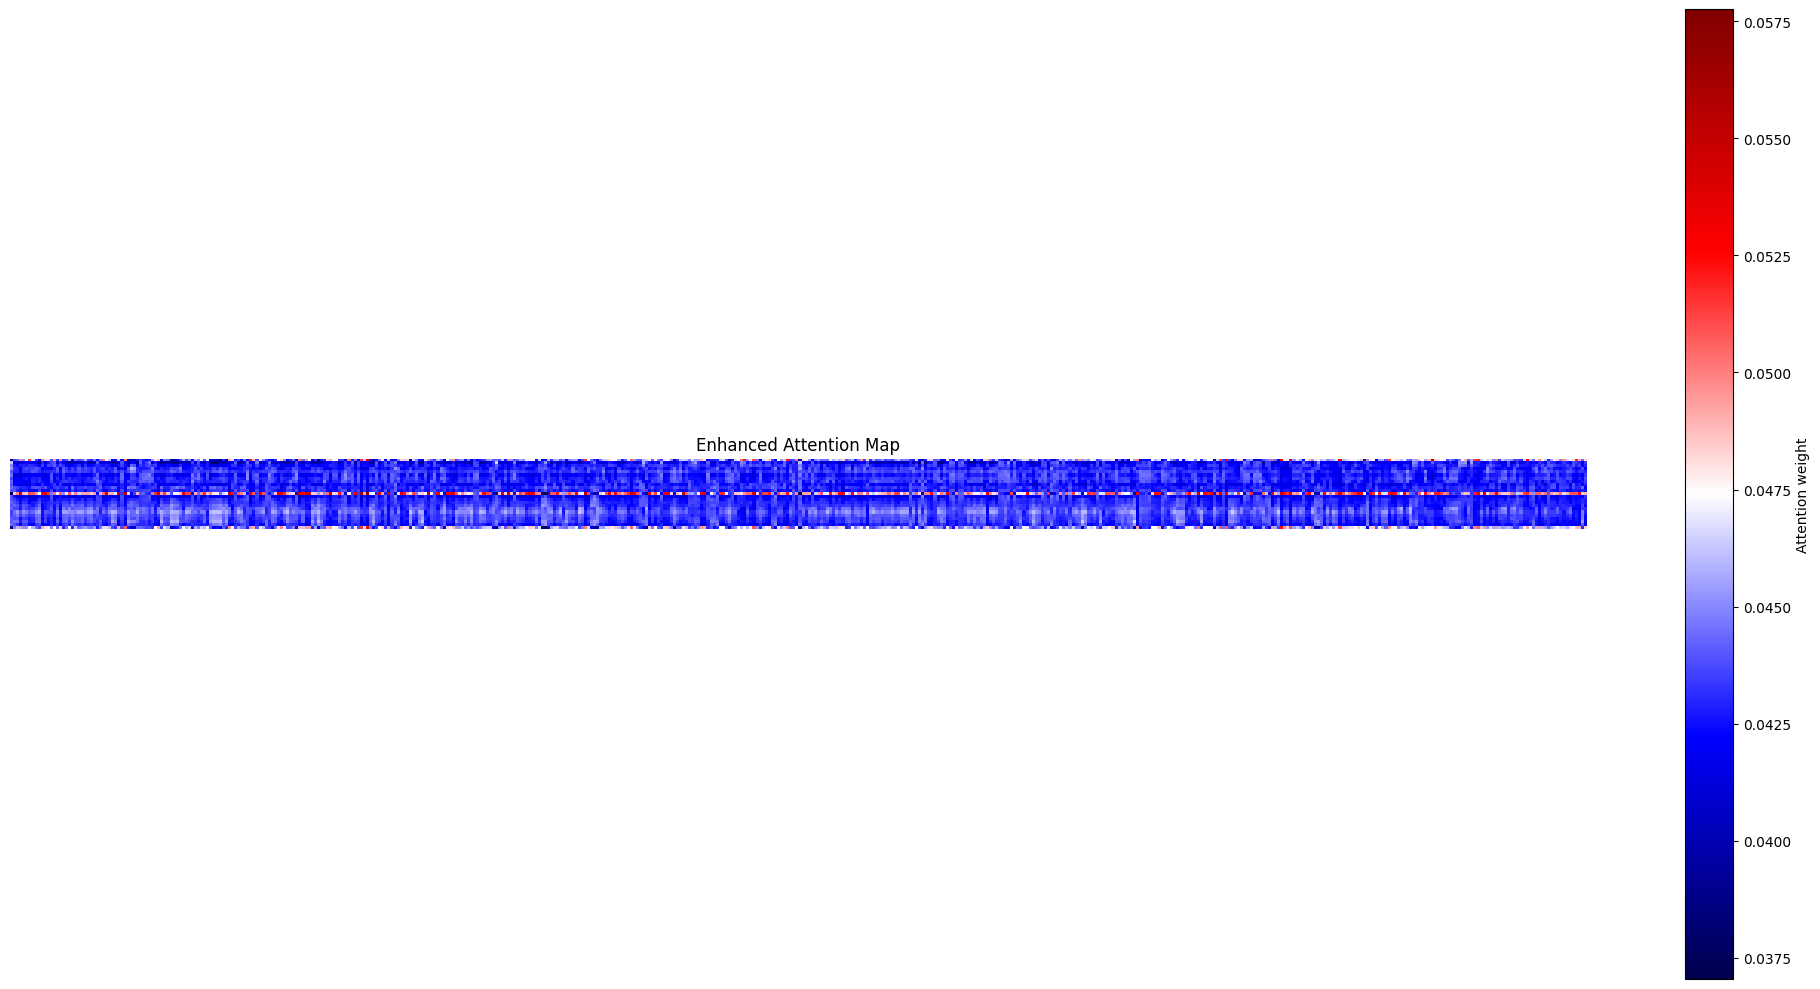

In [7]:
visualize_head(cache_avg)

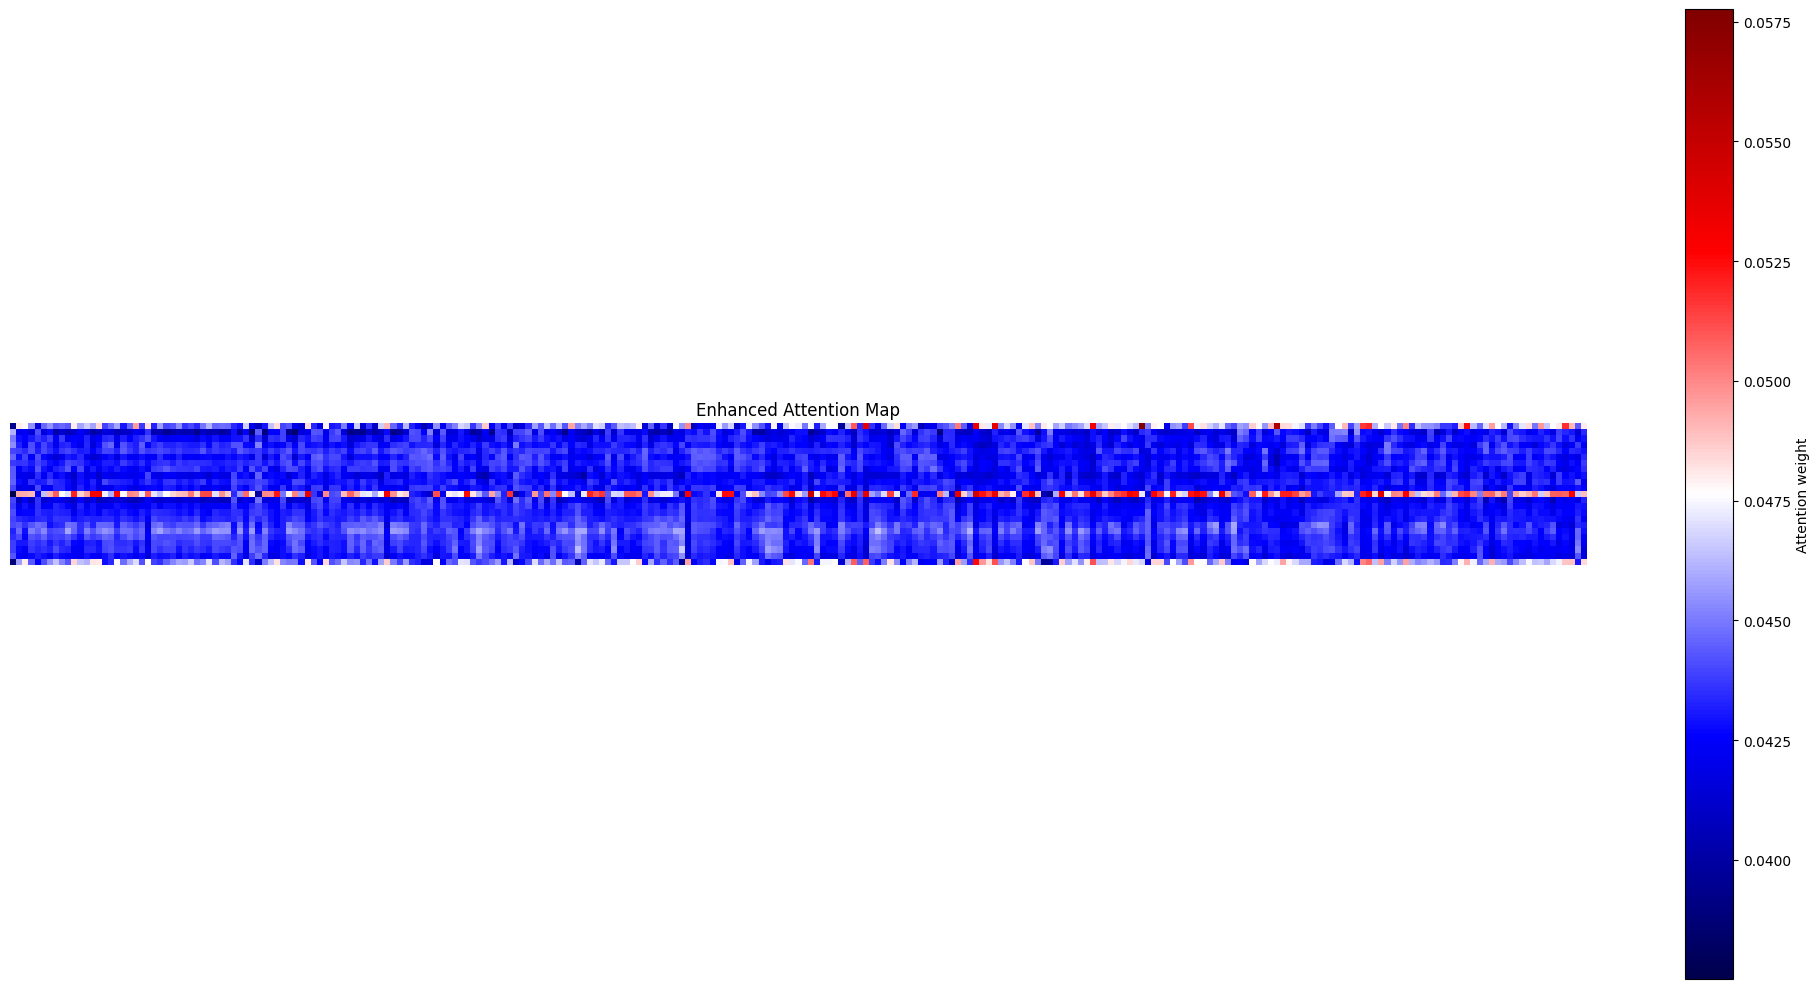

In [6]:
visualize_head(cache_avg[:, 257:])

In [5]:
def plot_attention_histogram(att_map, bins=50):
    plt.hist(att_map.flatten(), bins=bins, color='steelblue', edgecolor='black')
    plt.title("Attention Value Distribution")
    plt.xlabel("Attention Weight")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

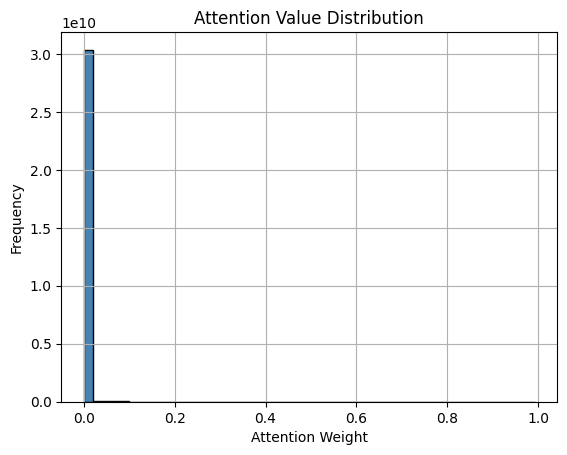

In [6]:
plot_attention_histogram(cache)

In [8]:
def get_histogram_info(att_map, bins=10):
    flat_data = att_map.flatten()
    counts, bin_edges = np.histogram(flat_data, bins=bins)

    # 打印出每个 bin 的区间和对应数量
    for i in range(len(counts)):
        print(f"Bin {i+1}: [{bin_edges[i]:.2f}, {bin_edges[i+1]:.2f}) -> Count: {counts[i]}")

    return counts, bin_edges

In [9]:
get_histogram_info(cache, bins=50)

Bin 1: [0.00, 0.02) -> Count: 30358816759
Bin 2: [0.02, 0.04) -> Count: 66315910
Bin 3: [0.04, 0.06) -> Count: 46577237
Bin 4: [0.06, 0.08) -> Count: 31414191
Bin 5: [0.08, 0.10) -> Count: 21417598
Bin 6: [0.10, 0.12) -> Count: 16499417
Bin 7: [0.12, 0.14) -> Count: 14349195
Bin 8: [0.14, 0.16) -> Count: 11603808
Bin 9: [0.16, 0.18) -> Count: 10649090
Bin 10: [0.18, 0.20) -> Count: 10201056
Bin 11: [0.20, 0.22) -> Count: 8988978
Bin 12: [0.22, 0.24) -> Count: 6920736
Bin 13: [0.24, 0.26) -> Count: 5050291
Bin 14: [0.26, 0.28) -> Count: 3240027
Bin 15: [0.28, 0.30) -> Count: 2194136
Bin 16: [0.30, 0.32) -> Count: 1506056
Bin 17: [0.32, 0.34) -> Count: 901150
Bin 18: [0.34, 0.36) -> Count: 538248
Bin 19: [0.36, 0.38) -> Count: 397073
Bin 20: [0.38, 0.40) -> Count: 383067
Bin 21: [0.40, 0.42) -> Count: 437268
Bin 22: [0.42, 0.44) -> Count: 552313
Bin 23: [0.44, 0.46) -> Count: 710810
Bin 24: [0.46, 0.48) -> Count: 953804
Bin 25: [0.48, 0.50) -> Count: 1355233
Bin 26: [0.50, 0.52) -> Count

(array([30358816759,    66315910,    46577237,    31414191,    21417598,
           16499417,    14349195,    11603808,    10649090,    10201056,
            8988978,     6920736,     5050291,     3240027,     2194136,
            1506056,      901150,      538248,      397073,      383067,
             437268,      552313,      710810,      953804,     1355233,
            1838447,     2280659,     2682377,     3121339,     3538266,
            3574379,     2937857,     2360707,     2319311,     2232455,
            2531514,     2928914,     3026737,     3443901,     4356499,
            5629524,     6981870,     8332942,     9739973,    11113436,
           11839696,    10496697,     6142972,     1702022,       74055]),
 array([6.74953042e-17, 1.98490694e-02, 3.96981388e-02, 5.95472120e-02,
        7.93962777e-02, 9.92453545e-02, 1.19094424e-01, 1.38943493e-01,
        1.58792555e-01, 1.78641632e-01, 1.98490709e-01, 2.18339771e-01,
        2.38188848e-01, 2.58037925e-01, 2.77886987e-